## Laboratorio 3

$$Laboratorio 3 -  Análisis Estadístico de Datos Simulados$$

Usando la implementación de ejemplo del sistema de línea de espera con un servidor (Modelo de colas G/G/1) en **Notebook Jupyter**, implementar:


1.   La medida de desempeño de tiempo promedio en fila de los clientes (Xi) para una corrida de simulación i .
2.   Implementar el método recursivo para calcular la media de la muestra y la varianza de la muestra.
3.   Calcular la media de la muestra (sample mean) y la varianza de la muestra (sample variance) para:
---
**a.** k=100 simulaciones.

**b.** k=1000 simulaciones.

**c.** k=10000 simulaciones.

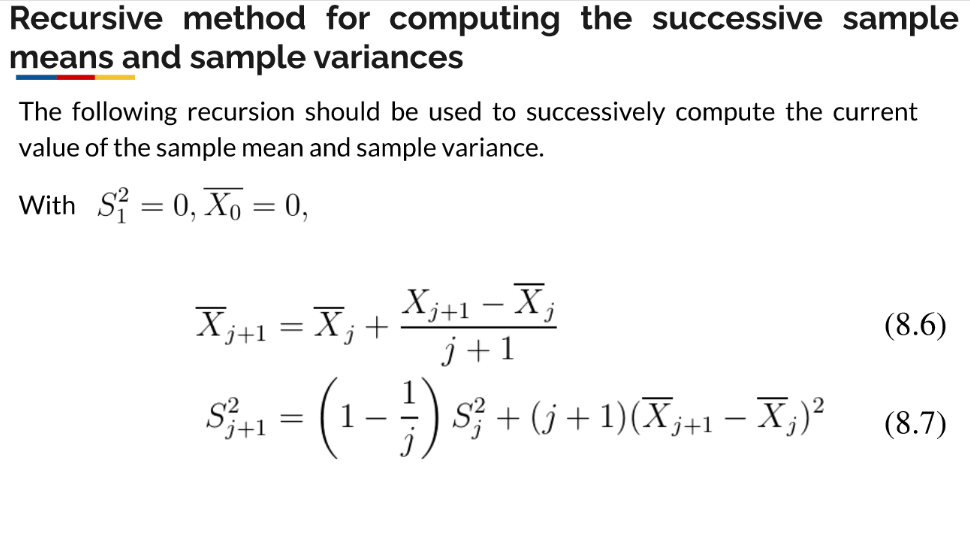

In [31]:
%matplotlib inline 

import numpy as np
import math
import matplotlib.pyplot as plt
import random
from statistics import mean

In [46]:
def gencongru1(): 
    Xant1 = random.randint(0, 1000000)
    a = 134775813
    c = 1
    m = 2**32
    Xnext = (a * Xant1 + c) % m
    Xant1 = Xnext
    U = Xnext / m
    return U

def gencongru2():
    Xant2 = random.randint(0, 1000000)
    a = 1140671485
    c = 12820163
    m = 2**24
    Xnext = (a * Xant2 + c) % m
    Xant2 = Xnext
    U = Xnext / m
    return U

def GenerarX():
    vlambda = 3
    U = gencongru1()
    X = -(math.log(1-U))/float(vlambda)
    return X

def GenerarY():
    vlambda = 7
    U = gencongru2()
    Y = -(math.log(1-U))/float(vlambda)
    return Y

def Llegada(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t=tsuc
    n = n + 1
    LLt.append(t)
    at.append(t)
    an.append(n)
    
    NLL = NLL + 1
    LL.append(t)
    
    X = GenerarX()
    
    if (t+X) < T:
        TSuc['tLL'] = t + X
    if n==1:
        Y = GenerarY()
        TSuc['tS'] = t + Y
        #Serv[NS]=Y 
        Serv.append(Y)
        
def Servidor(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t = tsuc
    n = n - 1
    
    St.append(t)
    at.append(t)
    an.append(n)
    
    NS = NS + 1
    S.append(t)

    if n>0:
        Y = GenerarY()
        TSuc['tS'] = t + Y
        Serv.append(Y) 

### Metodo de decoracion porque no se implementó  
def sampleMean(tiemposM):
  Media = []
  Media.append(0)
  for i in range(1, len(tiemposM)):
    if i==1 :
      Media.append(tiemposM[i])
    else:
      Xm = Media[i-1]+(tiemposM[i]-Media[i-1])/(i+1)
      Media.append(Xm)
  return Media

### Metodo de decoracion porque no se implementó 
def sampleVariance(tiemposM):
  Varianza = []
  Varianza.append(0)
  Varianza.append(0)
  for i in range(2, len(tiemposM)):
    Xv = (1-1/(i-1))*math.pow(Varianza[i-1],2)+(i)*math.pow(tiemposM[i]-tiemposM[i-1],2)
    Varianza.append(Xv)
  return Varianza


In [99]:
## Aquí se define el K para la cantidad a calcular
k=10000

MidContent=[] #se guardarán el tiempo medio de la cola para cada corrida
MidAcum=[] #al mandar a MidContent al metodo sample mean, guardaremos los resultados aquí.
variance = [] # Usando MidAcum obtenemos las varianzas acumuladas que nos traiga el metodo


for i in range(0,k):
  M = 99999.0
  T = 30.0
  at = []
  an = []
  LLt = []
  St = []

  t = tsuc = NLL = NS = n = 0

  at.append(t)
  an.append(n)

  TSuc = {"tLL":M, "tS":M}

  LL = []
  S = []
  Serv = []
  LL.append(0.0)
  S.append(0.0)
  Serv.append(0.0)



  X = GenerarX()

  if X > T:
      Tp = t_med_sistema = t_med_cola = 0.0
      exit
  else:
      Llegada(X)
      while((TSuc['tLL'] != M)|(TSuc['tS']!=M)):
          if TSuc['tLL'] < TSuc['tS']:
              tsuc = TSuc['tLL']
              TSuc['tLL'] = M
              Llegada(tsuc)
              
          if TSuc['tS'] < TSuc['tLL']:
              tsuc = TSuc['tS']
              TSuc['tS'] = M
              Servidor(tsuc)

      Tp = max(0,t-T)
      acumulo1 = acumulo2 = 0.0
      ind = 0
      
      while ind < NLL:
          acumulo1 = acumulo1 + S[ind] - LL[ind]
          acumulo2 = acumulo2 + S[ind] - LL[ind] - Serv[ind]
          ind = ind + 1
      t_med_sistema = acumulo1/NLL
      t_med_cola = acumulo2/NLL
      MidContent.append(t_med_cola)
      if i==0:
        MidAcum.append(MidContent[i])
        variance.append(0)
      else:
        Xm = MidAcum[i-1]+(MidContent[i]-MidAcum[i-1])/(i+1)
        MidAcum.append(Xm)
        Xv = (1-1/(i))*variance[i-1]+(i+1)*(MidAcum[i]-MidAcum[i-1])**2
        variance.append(Xv)
      if i==(100-1):
        print("media muestral para 100: ", mean(MidContent))
        print("Sample mean para k=100: ", MidAcum[i])
        print("varianza para 100: ", np.var(MidContent))
        print("Sample variance para k=100: ", variance[i])
      elif i==(1000-1):
        print("")
        print("media muestral para 1000: ", mean(MidContent))
        print("Sample mean para k=1000: ", MidAcum[i])
        print("varianza para 1000: ", np.var(MidContent))
        print("Sample variance para k=1000: ", variance[i])
      elif i==(10000-1):
        print("")
        print("media muestral para 10000: ", mean(MidContent))
        print("Sample mean para k=10000: ", MidAcum[i])
        print("varianza para 10000: ", np.var(MidContent))
        print("Sample variance para k=10000: ", variance[i])
      exit


media muestral para 100:  0.10688497212805792
Sample mean para k=100:  0.1068849721280579
varianza para 100:  0.003076131582926209
Sample variance para k=100:  0.003107203619117387

media muestral para 1000:  0.1031796169659131
Sample mean para k=1000:  0.10317961696591314
varianza para 1000:  0.0029669896787272412
Sample variance para k=1000:  0.0029699596383656055

media muestral para 10000:  0.10243371839681725
Sample mean para k=10000:  0.10243371839681766
varianza para 10000:  0.002843208624722951
Sample variance para k=10000:  0.0028434929740203205
